# SV Distribution
## How to measure distribution of SVs
Notes: 
Need to get X,Y coordinates of ROI pixels, as well as AZline pixels
1. Figure out how to get ROI data into Python! Line needs to be a list of pixel coordinates

    -Open synapse image. Open SV rois and PM rois. Draw a line for the AZ (PM_straightL end to PM_straightR end)
    
    -Select your AZ line-->File-->Save as...-->XY Coordinates. Save in Syn__ folder as Syn__AZ. 
    
     -This file is a list of all coordinates on your line but NOT in pixels yet. 

Synapses where this distance code may be a problem:
QUESTION- DOES IT MATTER THAT ALL OF THE SYNAPSES HAVE DIFFERENT SV COUNTS

* Syn09

* Syn20

* Syn25

* Syn27

* Syn40

* Syn62

* Syn70

* Syn111

In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
sns.set()

## IMPORTANT NOTE ON AZ FILE FORMAT
If you saved your AZ.txt line with no scale on Fiji, img_conversion= 3716px/inch

If you saved your AZ.txt file while doing other analysis and you saved it with a scale, your img_conversion =0.27px/nm

In [2]:
#Code to turn AZ line into X,Y coordinates
img_conversion = 3716 #px/inch. 
df = np.round(pd.read_table('Syn51AZ.txt', header=None)*img_conversion, decimals=4)
df_diff = df.diff()
df_ed = np.sqrt(df_diff.iloc[:,0]**2 +df_diff.iloc[:,1]**2) #Finding Euclidean distance
        #This code will only give you some pixel X,Y coordinates

x_fin, y_fin = [], [] 
#You must get the distances of all X,Y coordinates on that line. 
#If the distance between 2 pixel points (above) is more than 1, fill in the blanks by 1
for i in range(len(df)): 
    x, y = df.iloc[i,:]
    x_fin.append(x)
    y_fin.append(y)
    if i == len(df) - 1:
        continue
    if df_ed.iloc[i+1] < 1.1:
        continue
    x_fin += list(np.linspace(x, df.iloc[i+1,0], int(df_ed[i+1])))
    y_fin += list(np.linspace(y, df.iloc[i+1,1], int(df_ed[i+1])))
L = np.array([x_fin,y_fin]).T    

#If you want to make sure it worked and see all of your X,Y values of your line now, uncomment Ltable_pd
Ltabletest = {'X values':x_fin, 'Y values':y_fin}
Ltable_pd = pd.DataFrame(Ltabletest)
#Ltable_pd
    #Notice now none of the values are more than 1px apart

In [3]:
#Code to get all SV X,Y Coordinates. Ensure Path import is done!

##Unzip SV folder
import zipfile
with zipfile.ZipFile("Syn51SV.zip","r") as zip_ref:
    zip_ref.extractall("Syn51 SV ROI//")
    
##Create path where all ROIs are    
vesicle_path = Path('Syn51 SV ROI//')
vesicle_path.exists()    

##Make an array called names where you will put the X,Y coordinates from the ROI file name
names = []
for file in vesicle_path.iterdir():
    names.append(file.stem)

##Create arrays for X and Y coordinates for reach SV    
names_split = [name.split('-') for name in names]
v_x, v_y = [], []
for y_str, x_str in names_split:
    v_x.append(int(x_str))
    v_y.append(int(y_str))
V = np.array([v_x,v_y]).T 
    
#If you want to make sure it worked and see all of your X,Y values of your SV, uncomment Vtable_pd
Vtabletest = {'X values':v_x, 'Y values':v_y}
Vtable_pd = pd.DataFrame(Vtabletest)
#Vtable_pd

In [ ]:
#Create variables for conditions
SVdistances_aSynCon = 
SVdistances_aSyn = 
SVdistances_ResCon = 
SVdistances_Rescue = 

In [4]:
#Standard distance formula
def distance(v,p):
    return np.sqrt((v[0]-p[0])**2 +(v[1]-p[1])**2)

#import V and L
V = np.array([v_x,v_y]).T 
L = np.array([x_fin,y_fin]).T  

#Find the shortest distance from each ROI in V to any one point in L
min_dist= []
for v in V:
    d_v = []
    for p in L:
        d_v.append(distance(v,p))
    min_dist.append(np.min(d_v))

In [5]:
#Turn your pixel distance into an array and multiply it by the pixel/nm scale to get distance in nm
SVdistances = np.array(min_dist)/0.27
SVdistances

array([ 562.07715631,  279.47549795,  343.20045124,  518.79304983,
        619.39049639,  445.00788966,  722.47716736,  643.61122009,
        338.72836381,  500.29913673,  640.88305914, 1005.14936417,
        963.8197352 ,  672.00897004,  460.59324857,  760.32341732,
        465.24138301,  545.68412218,  722.29222508,  564.07467564,
        968.01907053,   56.7652036 , 1065.07140425,  248.55256347,
        578.31505007,  797.55514327,  380.76053296,  477.99498639,
        275.60611679,  251.0493331 , 1038.47566208,  447.9083152 ,
        425.06529139, 1029.7603936 ,   29.9055451 ,  577.58196102,
        295.81747866,  921.24102428,  684.79470749,  175.57047718,
       1066.40706236,  773.02796867,  411.26743427,  652.35664791,
        457.24494242])

In [6]:
#to check, get L and V for Syn76, and check mean
mean_dist= np.mean(SVdistances)
mean_dist

574.6498876839664

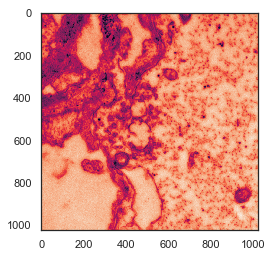

In [36]:
i

Text(0, 0.5, 'Y coordinate')

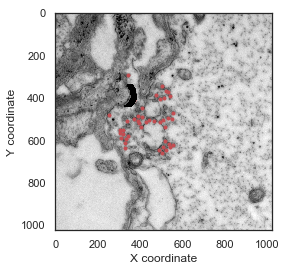

In [50]:
import matplotlib.pyplot as plt
im = plt.imread('Syn51.tif')
implot = plt.imshow(im, cmap='gray')
black, gray = ((0, 0, 0), (0.6, 0.6, 0.6))
plt.scatter(v_x, v_y, color='r', marker='.')
plt.scatter(x_fin, y_fin, color=black, marker=1, alpha=0.8)
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")


In [98]:
#Bar graph of the means for each figure
#plt.bar(mean_dist, height=5000, width=20, bottom=None)

(array([2., 0., 1., 0., 4., 2., 2., 2., 6., 3., 4., 3., 3., 2., 3., 0., 0.,
        1., 3., 4.]),
 array([  29.9055451 ,   81.73062096,  133.55569682,  185.38077269,
         237.20584855,  289.03092441,  340.85600028,  392.68107614,
         444.506152  ,  496.33122787,  548.15630373,  599.98137959,
         651.80645545,  703.63153132,  755.45660718,  807.28168304,
         859.10675891,  910.93183477,  962.75691063, 1014.5819865 ,
        1066.40706236]),
 <a list of 20 Patch objects>)

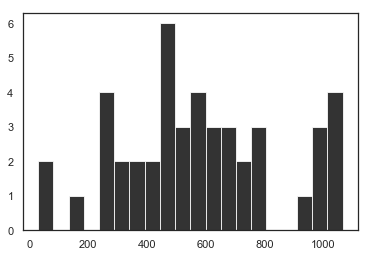

In [97]:
#Figure1, Con versus aSyn
sns.set_style("white")
black, gray = ((0, 0, 0), (0.6, 0.6, 0.6))
plt.hist(SVdistances, bins=20, color=black, alpha=0.8)

In [ ]:
#Figure5, Con versus Rescue
sns.set_style("white")
black, gray = ((0, 0, 0), (0.6, 0.6, 0.6))
plt.hist(SVdistances, bins=30, color=black, alpha=0.8)